In [1]:
import pandas as pd 
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import yfinance as yf
%matplotlib inline

In [2]:
msft = yf.download('MSFT', period="1y")

[*********************100%***********************]  1 of 1 completed


# Create plot 

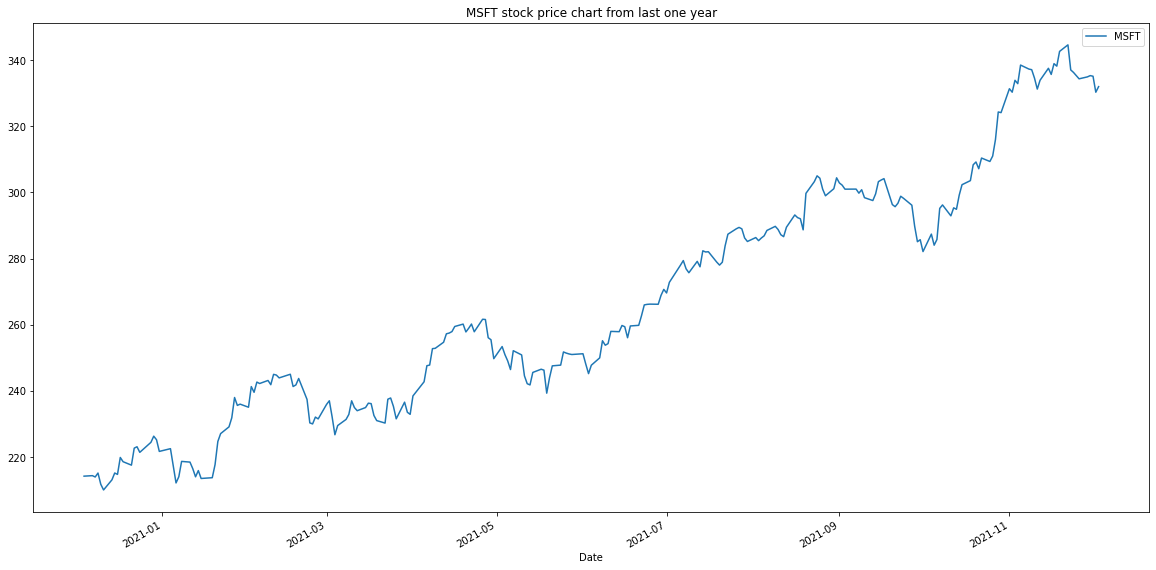

In [3]:
msft['Open'].plot(label = 'MSFT', figsize = (20,10))
plt.title('MSFT stock price chart from last one year')
plt.legend()

# Add MovingAverage

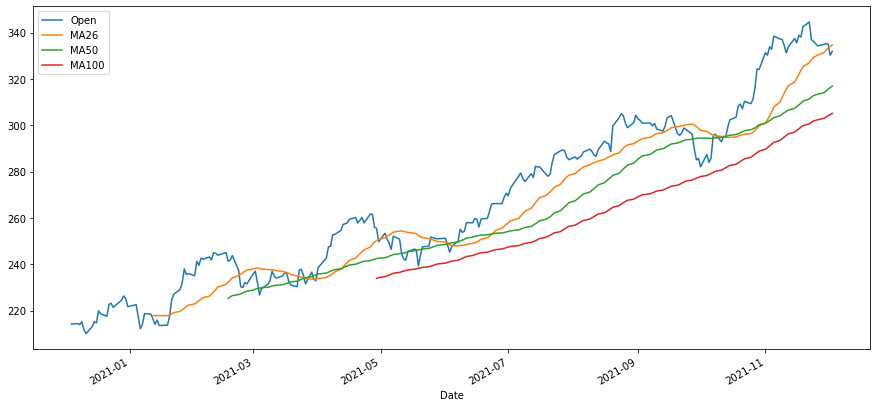

In [4]:
msft['MA26'] = msft['Open'].rolling(26).mean()
msft['MA50'] = msft['Open'].rolling(50).mean()
msft['MA100'] = msft['Open'].rolling(100).mean()
msft['Open'].plot(figsize = (15,7))
msft['MA26'].plot()
msft['MA50'].plot()
msft['MA100'].plot()
plt.legend()

# Volume of stock

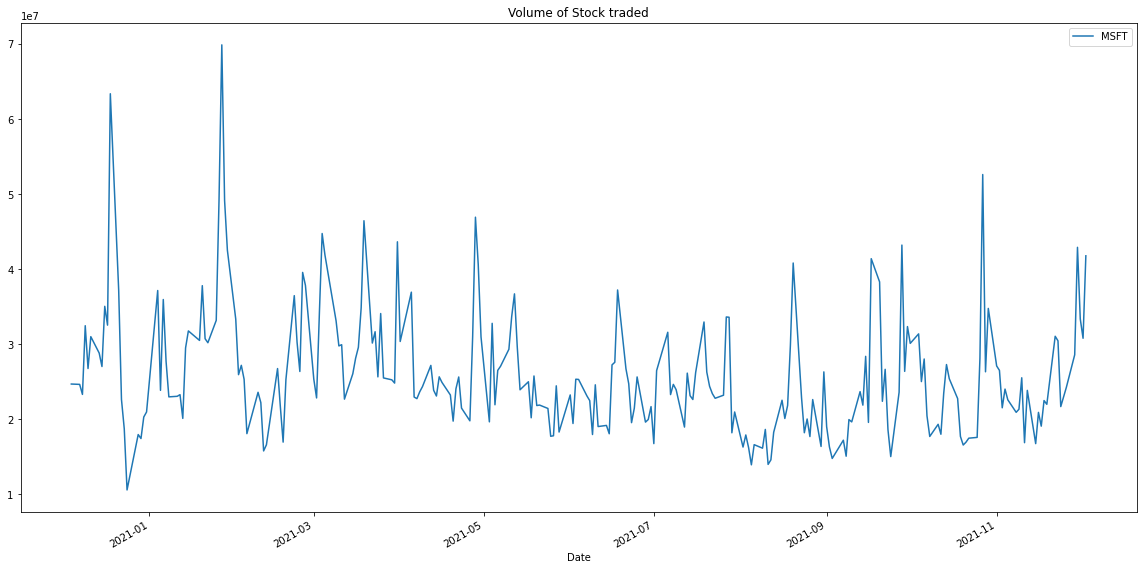

In [5]:
msft['Volume'].plot(label = 'MSFT', figsize = (20,10))
plt.title('Volume of Stock traded')
plt.legend()

# MarketCap chart

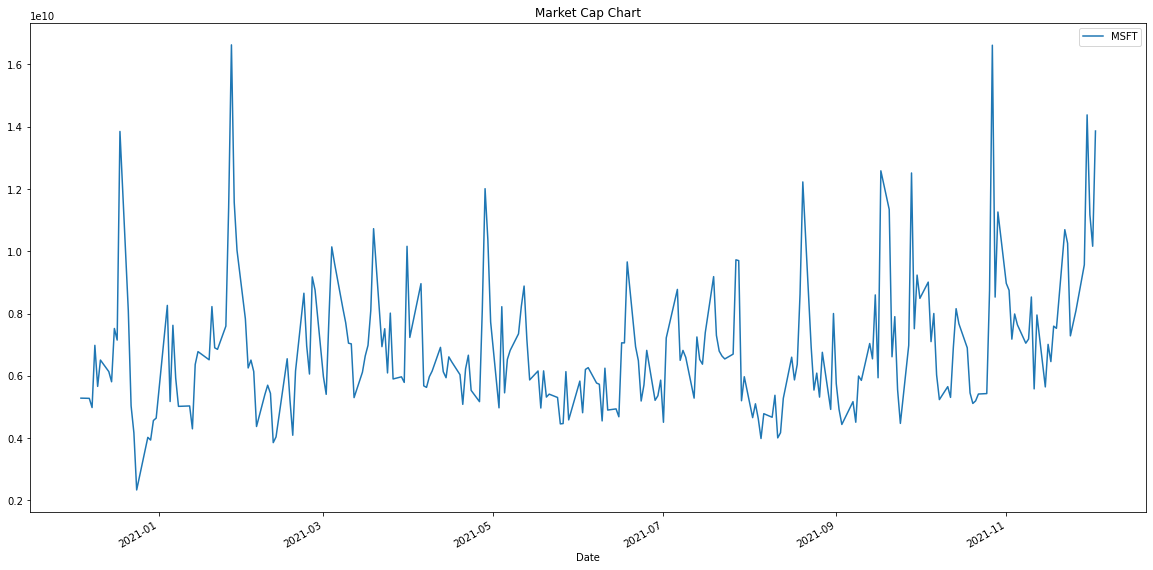

In [6]:
msft['MarktCap'] = msft['Open'] * msft['Volume']
msft['MarktCap'].plot(label = 'MSFT', figsize = (20,10))
plt.title('Market Cap Chart')
plt.legend()

# 

# Percentage increase in stock value

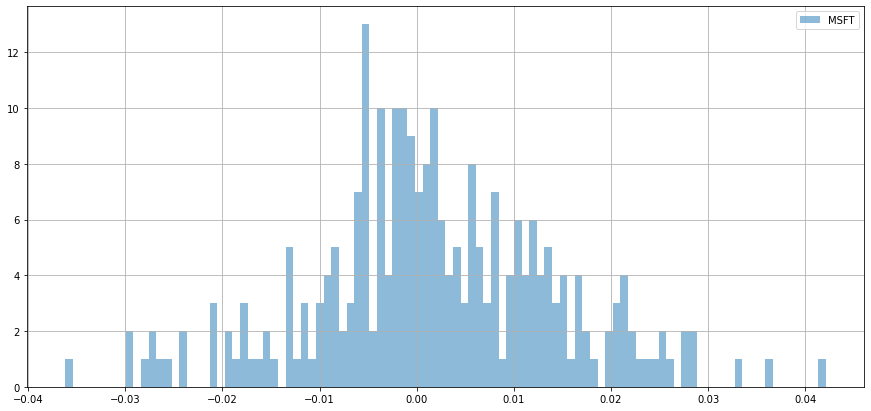

In [7]:
msft['returns'] = (msft['Close']/msft['Close'].shift(1)) -1
msft['returns'].hist(bins = 100, label = 'MSFT', alpha = 0.5, figsize = (15,7))
plt.legend()

In [8]:
msft= yf.Ticker("MSFT")
msft

yfinance.Ticker object <MSFT>

In [9]:
msft_historical = msft.history(start="2021-01-01", end="2021-11-11", interval="1d")
msft_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-31,219.857090,221.146286,217.853877,220.571106,20942100,0.0,0
2021-01-04,220.680196,221.146290,213.024368,215.880432,37130100,0.0,0
2021-01-05,215.453974,216.703510,213.906945,216.088654,23823000,0.0,0
2021-01-06,210.406305,214.690401,210.178221,210.485641,35930700,0.0,0
2021-01-07,212.260762,217.516708,211.933518,216.475433,27694500,0.0,0
...,...,...,...,...,...,...,...
2021-11-04,332.282087,335.925416,328.908255,335.825592,23992200,0.0,0
2021-11-05,337.891827,338.171315,333.809300,335.446289,22564000,0.0,0
2021-11-08,336.684035,337.033402,333.829272,336.374603,20897000,0.0,0


In [10]:
data_msft = yf.download("MSFT", start="2021-01-01",
                    end="2021-11-11", group_by='tickers')
data_msft

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,221.699997,223.000000,219.679993,222.419998,220.571106,20942100
2021-01-04,222.529999,223.000000,214.809998,217.690002,215.880432,37130100
2021-01-05,217.259995,218.520004,215.699997,217.899994,216.088669,23823000
2021-01-06,212.169998,216.490005,211.940002,212.250000,210.485641,35930700
2021-01-07,214.039993,219.339996,213.710007,218.289993,216.475433,27694500
...,...,...,...,...,...,...
2021-11-04,332.890015,336.540009,329.510010,336.440002,335.825592,23992200
2021-11-05,338.510010,338.790009,334.420013,336.059998,335.446289,22564000
2021-11-08,337.299988,337.649994,334.440002,336.989990,336.374603,20897000


# Price to Earnings Ratio

In [11]:
msft.info['forwardPE']

30.675215

# Dividends

In [12]:
msft.info['dividendRate']

2.48

In [13]:
msft.dividends

Date
2021-02-17    0.56
2021-05-19    0.56
2021-08-18    0.56
Name: Dividends, dtype: float64

# Actions

In [14]:
msft.actions

,Dividends,Stock Splits
Date,,
2021-02-17,0.56,0.0
2021-05-19,0.56,0.0
2021-08-18,0.56,0.0


# Sustainability

In [15]:
msft.sustainability

,Value
2021-9,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,8.06
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


# Recommendations

In [16]:
msft.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-03-16 08:19:00,Argus Research,Buy,,up
2012-03-19 14:00:00,Hilliard Lyons,Long-Term Buy,,main
2012-03-22 07:03:00,Morgan Stanley,Overweight,,main
2012-04-03 11:53:00,UBS,Buy,,main
2012-04-20 06:18:00,Deutsche Bank,Buy,,main
...,...,...,...,...
2021-10-27 12:37:42,Credit Suisse,Outperform,,main
2021-10-27 13:41:53,Barclays,Overweight,,main
2021-10-27 13:56:33,Morgan Stanley,Overweight,,main


# Callendar

In [17]:
msft.calendar

,0,1
Earnings Date,2022-01-24 10:59:00,2022-01-28 12:00:00
Earnings Average,2.31,2.31
Earnings Low,2.27,2.27
Earnings High,2.46,2.46
Revenue Average,50830400000,50830400000
Revenue Low,50536700000,50536700000
Revenue High,51555000000,51555000000
